# <a id='toc1_'></a>[Data Analysis for Artemis Apollo mission](#toc0_)

**Table of contents:**<a id='toc0_'></a>    
- [Data Analysis for Artemis Apollo mission](#toc1_)    
  - [01: Convert data to DataFrame](#toc1_1_)    
  - [02: Data Cleaning](#toc1_2_)    
      - [View and describe data:](#toc1_2_1_1_)    
      - [Visualization:](#toc1_2_1_2_)    
      - [Dealing with Missing value and Duplicate rows](#toc1_2_1_3_)    
    - [Outlier Detection](#toc1_2_2_)    
  - [03: Data Analysis](#toc1_3_)    
  - [04: Interpretation and prediction](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---

Basic information of the variables:
- ID: 
- Mission: 
- Type: 
- Subtype: 
- Weight (g): 
- Pristine (%):

---

Importing modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Add options:

In [2]:
plt.style.use('seaborn')
%matplotlib inline

C:\Users\ArminaRayaneh\AppData\Local\Temp\ipykernel_5920\1770176069.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## <a id='toc1_1_'></a>[01: Convert data to DataFrame](#toc0_)

Importing Data:

In [3]:
samples_df = pd.read_csv('Data/rocksamples.csv')

## <a id='toc1_2_'></a>[02: Data Cleaning](#toc0_)

#### <a id='toc1_2_1_1_'></a>[View and describe data:](#toc0_)

In [4]:
samples_df  #Show head, tail and shape of data

ID   Mission     Type   Subtype  Weight (g)  Pristine (%)
0     10001  Apollo11     Soil  Unsieved      125.80         88.36
1     10002  Apollo11     Soil  Unsieved     5629.00         93.73
2     10003  Apollo11   Basalt  Ilmenite      213.00         65.56
3     10004  Apollo11     Core  Unsieved       44.80         71.76
4     10005  Apollo11     Core  Unsieved       53.40         40.31
...     ...       ...      ...       ...         ...           ...
2224  79528  Apollo17  Breccia  Regolith        2.38        100.00
2225  79529  Apollo17  Breccia  Regolith        1.84        100.00
2226  79535  Apollo17  Breccia  Regolith        1.69        100.00
2227  79536  Apollo17  Breccia  Regolith        1.66        100.00
2228  79537  Apollo17  Breccia  Regolith        1.05        100.00

[2229 rows x 6 columns]

In [5]:
samples_df.info()
samples_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2229 non-null   int64  
 1   Mission       2229 non-null   object 
 2   Type          2229 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2229 non-null   float64
 5   Pristine (%)  2229 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 104.6+ KB


ID    Weight (g)  Pristine (%)
count   2229.000000   2229.000000   2229.000000
mean   52058.432032    168.253024     84.512764
std    26207.651471    637.286458     22.057299
min    10001.000000      0.000000      0.000000
25%    15437.000000      3.000000     80.010000
50%    65527.000000     10.200000     92.300000
75%    72142.000000     93.490000     98.140000
max    79537.000000  11729.000000    180.000000

**Warning:** why the _Pristine (%) max value_ is more than 100% !?

#### <a id='toc1_2_1_2_'></a>[Visualization:](#toc0_)

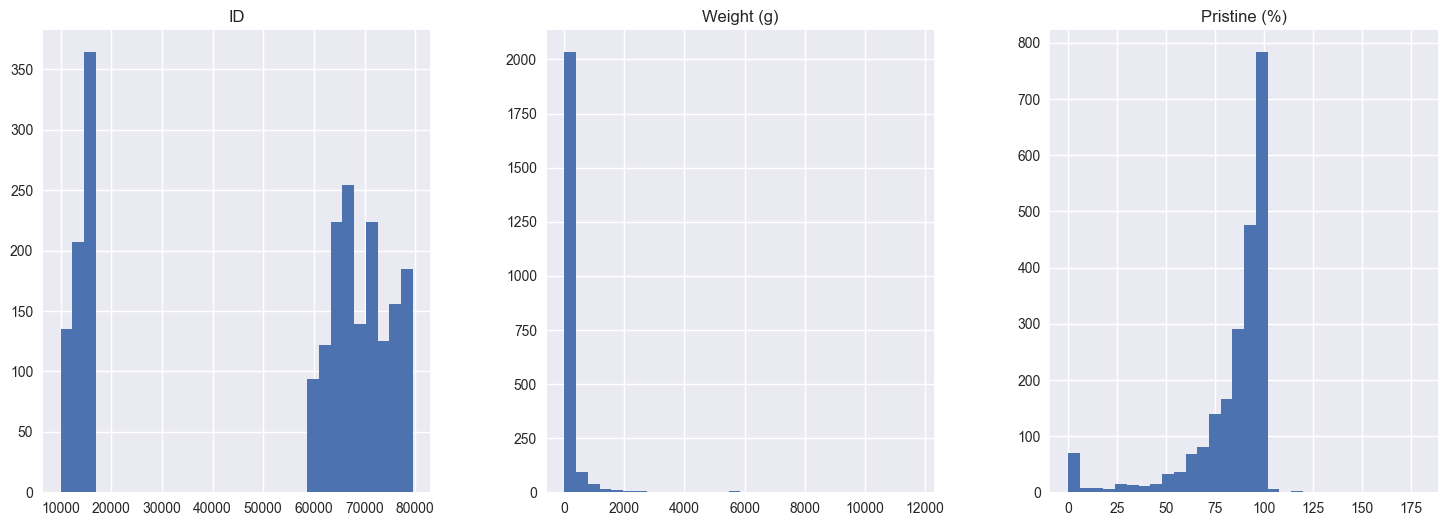

In [6]:
samples_df.hist(layout=(1, 3), figsize=(18, 6), bins=30)
plt.show()

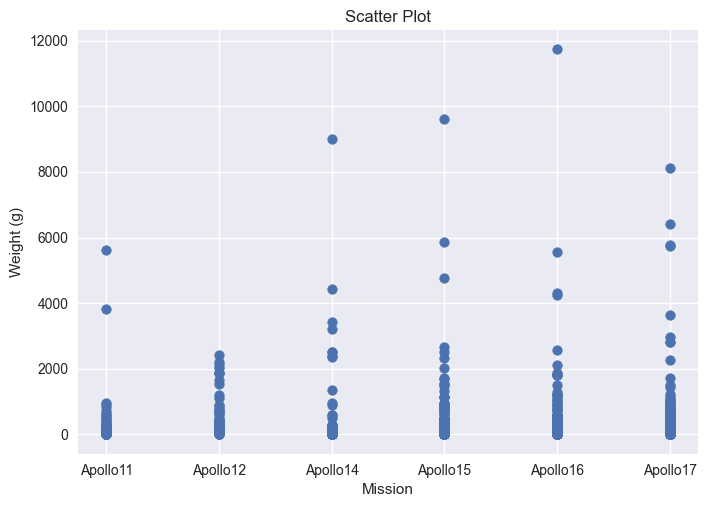

In [7]:
plt.scatter(samples_df['Mission'], samples_df['Weight (g)'])

plt.title('Scatter Plot')
plt.xlabel('Mission')
plt.ylabel('Weight (g)')
plt.show()

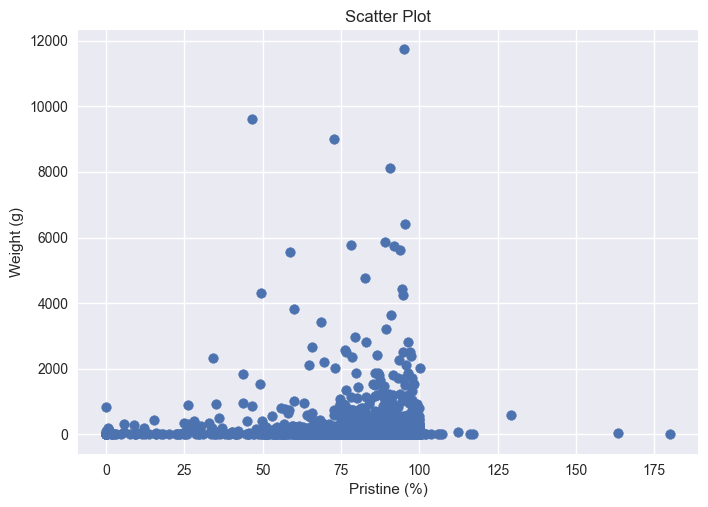

In [8]:
plt.scatter(samples_df['Pristine (%)'], samples_df['Weight (g)'])

plt.title('Scatter Plot')
plt.xlabel('Pristine (%)')
plt.ylabel('Weight (g)')
plt.show()

#### <a id='toc1_2_1_3_'></a>[Dealing with Missing value and Duplicate rows](#toc0_)

Creating a Backup from the Original DataSet and putting it up into the `samples_df_modify` data frame and working with it:

In [9]:
samples_df_modify = samples_df.copy()

Count of _NA (Not Available)_ value in every columns:

In [10]:
print(samples_df_modify.isna().sum())

ID              0
Mission         0
Type            0
Subtype         3
Weight (g)      0
Pristine (%)    0
dtype: int64


Count of _NaN (Not a Number)_ value in every columns:

In [11]:
print(samples_df_modify.isnull().sum())

ID              0
Mission         0
Type            0
Subtype         3
Weight (g)      0
Pristine (%)    0
dtype: int64


Count of _Duplicale rows_:

_(**Duplicate rows:** A row whose columns are the same as another row)_

In [12]:
print(samples_df_modify.duplicated().sum())

0


In [13]:
print('Data shape Before Handling missing data:')
print(samples_df_modify.shape)

Data shape Before Handling missing data:
(2229, 6)


Two approaches to handling missing data can be considered [(source)](https://blog.faradars.org/missing-data-in-r/):
- Removing observations or variables with missing values from statistical calculations and analyses.
- Replacing missing data with an alternative value (for example, the mean or median of variable values).

Replace _Weight (g)_ empty cells with _Weight (g) Mean_:

In [14]:
weight_mean = samples_df_modify['Weight (g)'].mean()
samples_df_modify['Weight (g)'].fillna(weight_mean, inplace=True)

  Remove missing values (Remove Rows) by `dropna()` function and putting up into `samples_df_modify` dataframe.
  
  Or use `samples_df_modify.dropna(inplace=True)` which does the same thing.

In [15]:
samples_df_modify.dropna(inplace=True)
print(samples_df_modify.shape)

(2226, 6)


Remove Duplicate rows with `drop_duplicates()` that it Return DataFrame with duplicate rows removed (if exist).

In [16]:
samples_df_modify.drop_duplicates(inplace=True)
print(samples_df_modify.shape)

(2226, 6)


In [17]:
print('After Handling missing data:')
print(samples_df_modify.shape)

After Handling missing data:
(2226, 6)


Conversion of weight unit from _gram_ to _kilogram_ for further analysis:

(Formula: 
$\text{kg} = \text{g} \times \frac{1}{1000}$)

In [18]:
samples_df_modify['Weight (g)'] = samples_df_modify['Weight (g)'].apply(
    lambda x: x * 0.001)


Rename _Weight (g)_ column title to _Weight (kg):_

In [19]:
samples_df_modify.rename(columns={'Weight (g)': 'Weight (kg)'}, inplace=True)
samples_df_modify.head()

ID   Mission    Type   Subtype  Weight (kg)  Pristine (%)
0  10001  Apollo11    Soil  Unsieved       0.1258         88.36
1  10002  Apollo11    Soil  Unsieved       5.6290         93.73
2  10003  Apollo11  Basalt  Ilmenite       0.2130         65.56
3  10004  Apollo11    Core  Unsieved       0.0448         71.76
4  10005  Apollo11    Core  Unsieved       0.0534         40.31

### <a id='toc1_2_2_'></a>[Outlier Detection](#toc0_)

Outliers:
- Caused by incorrect data entry.
- The real existence of outliers.

Remove outlire methods:
- [IQR _(with BoxPlot)_](https://en.wikipedia.org/wiki/Interquartile_range)
- [Skewnees](https://blog.faradars.org/skewness/)
- [Z-Score](https://chistio.ir/%D9%85%D8%AD%D8%A7%D8%B3%D8%A8%D9%87-%D8%AF%D8%A7%D8%AF%D9%87-%D9%BE%D8%B1%D8%AA-z-score/)
- ...

For read more:
- [Cleaning up Data from Outliers _(Pluralsight.com)_](https://www.pluralsight.com/guides/cleaning-up-data-from-outliers)
- [Ways to Detect and Remove the Outliers _(Towardsdatascience.com)_](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)


Outlier Detection with _BoxPlot:_

![Box polot](img/boxplot.jpg)

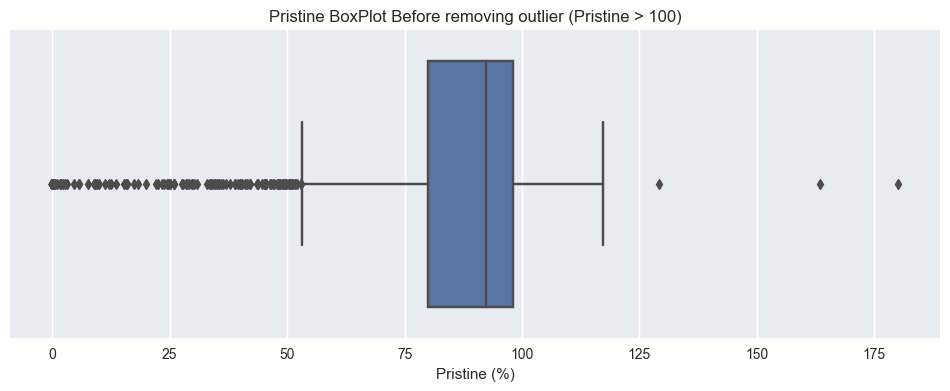

In [20]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=samples_df_modify['Pristine (%)'])

plt.title('Pristine BoxPlot Before removing outlier (Pristine > 100)')
plt.show()

Remove Outliers (rows) with IQR _(InterQuartile Range)_ method [(Read more)](https://en.wikipedia.org/wiki/Interquartile_range):

$
\text{IQR} = Q_3 - Q_1 \\
\text{Minimum} = Q_1 - 1.5 \times \text{IQR} \\
\text{Maximum} = Q_3 + 1.5 \times \text{IQR}
$

For remove Outlier of Weight (If needed), with IQR method, use below Code:

```{python}
q1_weight = samples_df_modify['Weight (kg)'].quantile(q=0.25)
q3_weight = samples_df_modify['Weight (kg)'].quantile(q=0.75)

IQR_weight = q3_weight - q1_weight

minimum = q1_weight - 1.5*IQR_weight
maximum = q3_weight + 1.5*IQR_weight


for row in samples_df_modify.index:
    if samples_df_modify.loc[row, 'Weight (kg)'] < (minimum):
        samples_df_modify.drop(row, inplace=True)
    
    if samples_df_modify.loc[row, 'Weight (kg)'] > (maximum):
        samples_df_modify.drop(row, inplace=True)

```

Remove Outlier of Pristine% if _Pristine > 100_:

In [21]:
print('Length of (Pristines > 100):' ,len(samples_df_modify['Pristine (%)'][samples_df_modify['Pristine (%)'] > 100]))
print('Maximum Pristine:' ,samples_df_modify['Pristine (%)'].max())

print('\nPristines > 100:\n')
print(samples_df_modify['Pristine (%)'][samples_df_modify['Pristine (%)'] > 100])

Length of (Pristines > 100): 18
Maximum Pristine: 180.0

Pristines > 100:

50      112.50
82      100.08
91      163.41
123     107.11
279     100.58
294     129.14
365     106.11
424     180.00
438     100.24
465     106.50
581     100.73
697     116.25
698     117.22
699     100.43
847     102.10
1440    103.60
1529    101.73
1853    100.20
Name: Pristine (%), dtype: float64


Removing:

In [22]:
for row in samples_df_modify.index:
    if samples_df_modify.loc[row, 'Pristine (%)'] > 100:
        samples_df_modify.drop(row, inplace=True)

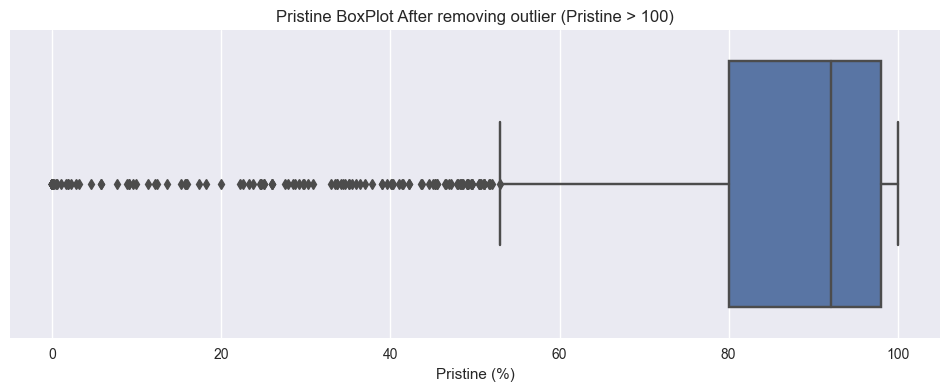

In [23]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=samples_df_modify['Pristine (%)'])

plt.title('Pristine BoxPlot After removing outlier (Pristine > 100)')
plt.show()

In [24]:
samples_df_modify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2208 non-null   int64  
 1   Mission       2208 non-null   object 
 2   Type          2208 non-null   object 
 3   Subtype       2208 non-null   object 
 4   Weight (kg)   2208 non-null   float64
 5   Pristine (%)  2208 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 185.3+ KB


## <a id='toc1_3_'></a>[03: Data Analysis](#toc0_)

Create a DataFrame with a new structure to store the analysis results:

In [25]:
missions = pd.DataFrame()
missions

Empty DataFrame
Columns: []
Index: []

Extract unique values:

In [26]:
missions['Mission'] = samples_df_modify['Mission'].unique()
missions

Mission
0  Apollo11
1  Apollo12
2  Apollo14
3  Apollo15
4  Apollo16
5  Apollo17

Calculate the Sum of the _Weight column_ based on the _group by Missions_:

In [27]:
total_sampels_weight = samples_df_modify.groupby('Mission')['Weight (kg)'].sum()
total_sampels_weight  # is Series

Mission
Apollo11     21.49408
Apollo12     31.82968
Apollo14     41.24569
Apollo15     74.95400
Apollo16     92.46112
Apollo17    109.31729
Name: Weight (kg), dtype: float64

Merge `total_sampels_weight` and `mission`:

In [28]:
missions = pd.merge(left=missions, right=total_sampels_weight, on='Mission')
missions.rename(columns={'Weight (kg)' : 'Total weight of Samples (kg)'}, inplace=True)

missions

Mission  Total weight of Samples (kg)
0  Apollo11                      21.49408
1  Apollo12                      31.82968
2  Apollo14                      41.24569
3  Apollo15                      74.95400
4  Apollo16                      92.46112
5  Apollo17                     109.31729

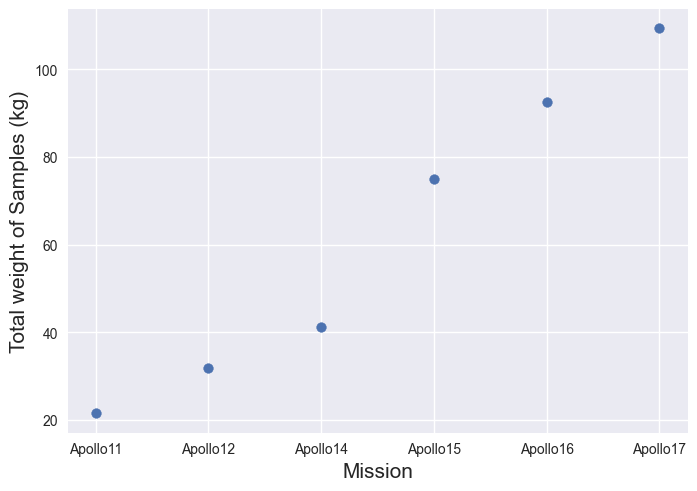

In [29]:
plt.scatter(missions['Mission'], missions['Total weight of Samples (kg)'])

plt.xlabel('Mission', fontsize=15)
plt.ylabel('Total weight of Samples (kg)', fontsize=15)
plt.show()

Caculate the difference of weight data from previous weight for find more information; with `diff()` function:

In [30]:
missions['Weight Diff'] = missions['Total weight of Samples (kg)'].diff()

missions

Mission  Total weight of Samples (kg)  Weight Diff
0  Apollo11                      21.49408          NaN
1  Apollo12                      31.82968     10.33560
2  Apollo14                      41.24569      9.41601
3  Apollo15                      74.95400     33.70831
4  Apollo16                      92.46112     17.50712
5  Apollo17                     109.31729     16.85617

Fill NaN value with 0:

In [31]:
missions['Weight Diff'] = missions['Weight Diff'].fillna(value=0)

missions

Mission  Total weight of Samples (kg)  Weight Diff
0  Apollo11                      21.49408      0.00000
1  Apollo12                      31.82968     10.33560
2  Apollo14                      41.24569      9.41601
3  Apollo15                      74.95400     33.70831
4  Apollo16                      92.46112     17.50712
5  Apollo17                     109.31729     16.85617

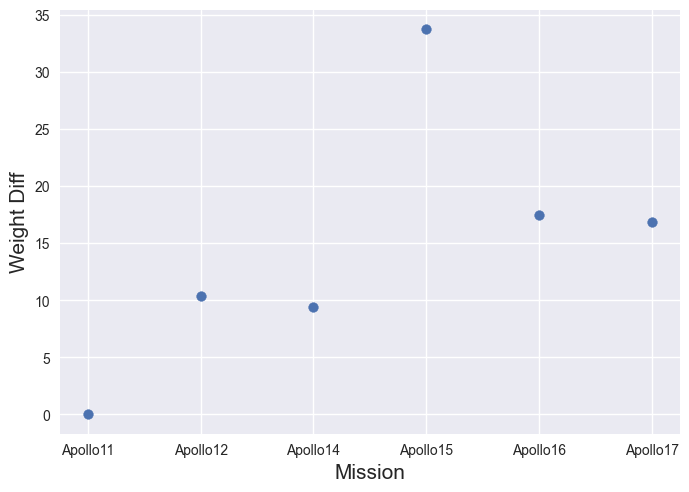

In [32]:
plt.scatter(missions['Mission'], missions['Weight Diff'])

plt.xlabel('Mission', fontsize=15)
plt.ylabel('Weight Diff', fontsize=15)
plt.show()

Add _Lunar module_ and _Command module_ Columns

Read more:
- [مهندسی بی‌نهایت: ساترن 5، پیش به سوی ماه  _(Zoomit.ir)_](https://www.zoomit.ir/fundamental-science/269918-infinite-engineering-saturn-v/)
- in [Nasa Archive _(Nasa.gov)_](https://nssdc.gsfc.nasa.gov/nmc/spacecraft/query) print Name: apollo.


In [33]:
LMs = ['Eagle (LM-5)', 'Intrepid (LM-6)', 'Antares (LM-8)', 'Falcon (LM-10)', 'Orion (LM-11)', 'Challenger (LM-12)']
missions['Lunar moduls (LM)'] = LMs

missions['LM mass (kg)'] = [15103, 15235, 15264, 16430, 16445, 16456]
missions['LM mass diff'] = missions['LM mass (kg)'].diff()
missions['LM mass diff'] = missions['LM mass diff'].fillna(value=0)

In [34]:
CMs = ['Columbia (CSM-107)', 'Yankee Clipper (CM-108)', 'Kitty Hawk (CM-110)', 'Endeavor (CM-112)', 'Casper (CM-113)', 'America (CM-114)']
missions['Command module (CM)'] = CMs

missions['CM mass (kg)'] = [5560, 5609, 5758, 5875, 5840, 5960]
missions['CM mass diff'] = missions['CM mass (kg)'].diff()
missions['CM mass diff'] = missions['CM mass diff'].fillna(value=0)


In [35]:
missions

Mission  Total weight of Samples (kg)  Weight Diff   Lunar moduls (LM)  \
0  Apollo11                      21.49408      0.00000        Eagle (LM-5)   
1  Apollo12                      31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14                      41.24569      9.41601      Antares (LM-8)   
3  Apollo15                      74.95400     33.70831      Falcon (LM-10)   
4  Apollo16                      92.46112     17.50712       Orion (LM-11)   
5  Apollo17                     109.31729     16.85617  Challenger (LM-12)   

   LM mass (kg)  LM mass diff      Command module (CM)  CM mass (kg)  \
0         15103           0.0       Columbia (CSM-107)          5560   
1         15235         132.0  Yankee Clipper (CM-108)          5609   
2         15264          29.0      Kitty Hawk (CM-110)          5758   
3         16430        1166.0        Endeavor (CM-112)          5875   
4         16445          15.0          Casper (CM-113)          5840   
5         16456          11.0         America (CM-114)          5960   

   CM mass diff  
0           0.0  
1          49.0  
2         149.0  
3         117.0  
4         -35.0  
5         120.0

Calculate the Sum of the _CM mass (kg)_ and _CM mass (kg)_ and Calculate this result Difference:

In [36]:
missions['Total weight (kg)'] = missions['LM mass (kg)'] + missions['CM mass (kg)']
missions['Total weight diff'] = missions['LM mass diff'] + missions['CM mass diff']

missions

Mission  Total weight of Samples (kg)  Weight Diff   Lunar moduls (LM)  \
0  Apollo11                      21.49408      0.00000        Eagle (LM-5)   
1  Apollo12                      31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14                      41.24569      9.41601      Antares (LM-8)   
3  Apollo15                      74.95400     33.70831      Falcon (LM-10)   
4  Apollo16                      92.46112     17.50712       Orion (LM-11)   
5  Apollo17                     109.31729     16.85617  Challenger (LM-12)   

   LM mass (kg)  LM mass diff      Command module (CM)  CM mass (kg)  \
0         15103           0.0       Columbia (CSM-107)          5560   
1         15235         132.0  Yankee Clipper (CM-108)          5609   
2         15264          29.0      Kitty Hawk (CM-110)          5758   
3         16430        1166.0        Endeavor (CM-112)          5875   
4         16445          15.0          Casper (CM-113)          5840   
5         16456          11.0         America (CM-114)          5960   

   CM mass diff  Total weight (kg)  Total weight diff  
0           0.0              20663                0.0  
1          49.0              20844              181.0  
2         149.0              21022              178.0  
3         117.0              22305             1283.0  
4         -35.0              22285              -20.0  
5         120.0              22416              131.0

Calculation of _Weight ratios_. An index for predictions:

In [37]:
saturn_5_Payload = 43500

missions['Crewed area : Payload'] = missions['Total weight (kg)'] / saturn_5_Payload
missions['Sample : Crewed area'] = missions['Total weight of Samples (kg)'] / missions['Total weight (kg)']
missions['Sample : Payload'] = missions['Total weight of Samples (kg)'] / saturn_5_Payload

missions

Mission  Total weight of Samples (kg)  Weight Diff   Lunar moduls (LM)  \
0  Apollo11                      21.49408      0.00000        Eagle (LM-5)   
1  Apollo12                      31.82968     10.33560     Intrepid (LM-6)   
2  Apollo14                      41.24569      9.41601      Antares (LM-8)   
3  Apollo15                      74.95400     33.70831      Falcon (LM-10)   
4  Apollo16                      92.46112     17.50712       Orion (LM-11)   
5  Apollo17                     109.31729     16.85617  Challenger (LM-12)   

   LM mass (kg)  LM mass diff      Command module (CM)  CM mass (kg)  \
0         15103           0.0       Columbia (CSM-107)          5560   
1         15235         132.0  Yankee Clipper (CM-108)          5609   
2         15264          29.0      Kitty Hawk (CM-110)          5758   
3         16430        1166.0        Endeavor (CM-112)          5875   
4         16445          15.0          Casper (CM-113)          5840   
5         16456          11.0         America (CM-114)          5960   

   CM mass diff  Total weight (kg)  Total weight diff  Crewed area : Payload  \
0           0.0              20663                0.0               0.475011   
1          49.0              20844              181.0               0.479172   
2         149.0              21022              178.0               0.483264   
3         117.0              22305             1283.0               0.512759   
4         -35.0              22285              -20.0               0.512299   
5         120.0              22416              131.0               0.515310   

   Sample : Crewed area  Sample : Payload  
0              0.001040          0.000494  
1              0.001527          0.000732  
2              0.001962          0.000948  
3              0.003360          0.001723  
4              0.004149          0.002126  
5              0.004877          0.002513

Calculation of _Average ratios_. A balanced index:

In [38]:
crewedArea_payload_ratio = missions['Crewed area : Payload'].mean()
sample_crewedArea_ratio = missions['Sample : Crewed area'].mean()
sample_payload_ratio = missions['Sample : Payload'].mean()

print('CrewedArea payload ratio:', crewedArea_payload_ratio)
print('Sample crewedArea ratio:', sample_crewedArea_ratio)
print('Sample payload ratio:', sample_payload_ratio)

CrewedArea payload ratio: 0.4963026819923371
Sample crewedArea ratio: 0.002819247186872154
Sample payload ratio: 0.001422612490421456


## <a id='toc1_4_'></a>[04: Interpretation and prediction](#toc0_)

Predicting the weight of samples

ایجاد دیتافریم جدید برای ثبت ننتایج پیش بینی

In [39]:
artemis_mission = pd.DataFrame({'Mission':['artemis1', 'artemis1b', 'artemis2'], 'Payload (kg)': [26988, 37965, 42955]})
artemis_mission['Total weight (kg)'] = artemis_mission['Payload (kg)'] * crewedArea_payload_ratio

artemis_mission

Mission  Payload (kg)  Total weight (kg)
0   artemis1         26988       13394.216782
1  artemis1b         37965       18842.131322
2   artemis2         42955       21318.681705

تفسیر وزن نمونه برداری از روی داده های جدید

In [40]:
artemis_mission['Sample weight from total (kg)'] = artemis_mission['Total weight (kg)'] * sample_crewedArea_ratio
artemis_mission['Sample weight from payload (kg)'] = artemis_mission['Payload (kg)'] * sample_payload_ratio

artemis_mission

Mission  Payload (kg)  Total weight (kg)  Sample weight from total (kg)  \
0   artemis1         26988       13394.216782                      37.761608   
1  artemis1b         37965       18842.131322                      53.120626   
2   artemis2         42955       21318.681705                      60.102633   

   Sample weight from payload (kg)  
0                        38.393466  
1                        54.009483  
2                        61.108320

پیش بینی وزن نمونه برداری با میانگین گیری از نتایج تفسیر

In [41]:
artemis_mission['Estimated sample weight (kg)'] = (artemis_mission['Sample weight from total (kg)'] + artemis_mission['Sample weight from payload (kg)']) / 2

artemis_mission

Mission  Payload (kg)  Total weight (kg)  Sample weight from total (kg)  \
0   artemis1         26988       13394.216782                      37.761608   
1  artemis1b         37965       18842.131322                      53.120626   
2   artemis2         42955       21318.681705                      60.102633   

   Sample weight from payload (kg)  Estimated sample weight (kg)  
0                        38.393466                     38.077537  
1                        54.009483                     53.565054  
2                        61.108320                     60.605476

تفسیر اولویت نمونه برداری

In [42]:
samples_df_modify['Remaining (kg)'] = samples_df_modify['Weight (kg)'] * (samples_df_modify['Pristine (%)'] * 0.01)

samples_df_modify.describe()

ID  Weight (kg)  Pristine (%)  Remaining (kg)
count   2208.000000  2208.000000   2208.000000     2208.000000
mean   52295.559783     0.168162     84.313465        0.137689
std    26118.027174     0.638858     21.833291        0.526621
min    10001.000000     0.000000      0.000000        0.000000
25%    15467.750000     0.003027     80.000000        0.002450
50%    65538.500000     0.010215     92.150000        0.008565
75%    72151.250000     0.093423     98.042500        0.077061
max    79537.000000    11.729000    100.000000       11.169527

تعریف دیتافریمی از نمونه های بحرانی

In [43]:
samples_critical = samples_df_modify.loc[(samples_df_modify['Weight (kg)'] <= 0.168) & (samples_df_modify['Remaining (kg)'] <= 0.137)]

samples_critical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 0 to 2228
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1772 non-null   int64  
 1   Mission         1772 non-null   object 
 2   Type            1772 non-null   object 
 3   Subtype         1772 non-null   object 
 4   Weight (kg)     1772 non-null   float64
 5   Pristine (%)    1772 non-null   float64
 6   Remaining (kg)  1772 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 110.8+ KB


محاسبه وزن نمونه های بحرانی

In [44]:
samples_critical.groupby('Type')['Weight (kg)'].sum()

Type
Basalt      4.75262
Breccia    12.32471
Core        1.03927
Crustal     0.48060
Soil       17.81696
Special     0.00300
Name: Weight (kg), dtype: float64

پیش بینی نمونه های مورد نیاز در آرتمیس

In [45]:
# اگر همه نمونه های اولویت بندی شده از نظر محدودیت وزنی قابل پیشنهاد هستند.
samples_needed = samples_critical

# اگر وزن نمونه های اولویت بندی شده بیش از ظرفیت وزنی نمونه گیری آرتمیس باشد
# samples_needed = samples_critical.loc[samples_critical['Type'].isin(['Basalt', 'Breccia'])]

چکیده گزارش پیش بینی وزن و نوع نمونه های مورد نیاز

In [46]:
samples_needed_overview = pd.DataFrame()

samples_needed_overview['Type'] = samples_critical['Type'].unique()
samples_needed_weight = samples_needed.groupby('Type')['Weight (kg)'].sum().reset_index()
samples_needed_overview = pd.merge(samples_needed_overview, samples_needed_weight, on='Type')

samples_needed_overview

Type  Weight (kg)
0     Soil     17.81696
1     Core      1.03927
2  Breccia     12.32471
3   Basalt      4.75262
4  Crustal      0.48060
5  Special      0.00300

---

**End.**